## 5.2 Training a convnet from scratch on a small dataset

 - Deep Learning with Python - FRANÇOIS CHOLLET

    - Ch 5. Deep learning for computer vision
    
        - 5.2 Training a convnet from scratch on a small dataset

18 June 2023 - see lec 2 Q3 - Nasir hussain for more Details


We downloaded the following dataset:
                 [https://www.kaggle.com/c/dogs-vs-cats/data]
                 

In [1]:
import os, shutil

# shutil: ye aik utility hay 'util', 'sh utility', used to perform transactions at operating system level
# e.g: copy kr li koi file, remove kr li koi file etc ...

# os: operating system
# operating system ko agar code k through handle krna hay tu aap, 'os' library
# use kr sktay hain


Dataset k folder main aik base directory bnai hay
- 'cats n dogs'


In [2]:
# An error will be generated when you run this code on this pc, read the cell
# carefully to understand the reason behind error generation

# Created a string - simply copied the path of 'train' folder of the dataset
original_dataset_dir  =  r'C:\Users\Ans Imran\Desktop\PIAIC\Artificial Intelligence Engineering\Q3\Practice\Datasets\dogs-vs-cats\train'

# Notice, following this procedure, the folder 'cats n dogs' will be automatically created inside the folder 'dogs-vs-cats'
base_dir              =  r'C:\Users\Ans Imran\Desktop\PIAIC\Artificial Intelligence Engineering\Q3\Practice\Datasets\dogs-vs-cats\cats n dogs'

os.mkdir(base_dir) 

# Notice 'r' lgana zroori hay string k shuru main, otherwise it'll not work
# python main ya tu '/' lgao, path k andar. Varna agar '\' lgaya tu 'r' use kro
# 'r' python ko bta deta hay k ye 'raw' string hay, so python ko pta hota hay
# ab, k '\' k sath kia krna hay


# Also, agar 'cats n dogs' already bna hua tu, 'already exists error' aaye ga 


Ab hum 3een folder bnanay lgay hain, 'train', 'validation' & 'test' inside the  'base directory'


- cats n dogs
 - train
 - validation
 - test


In [3]:
# 'train' valay folder ko 'base directory' k aagay join kr do

# is nay 'base_dir' k address k aagay slash lga k train likha, or aik new string-address bna dia, next..
train_dir                 =    os.path.join(base_dir, 'train')       
# mkdir: make directory, ye input adress par, input k hisab say folder bna day ga?
# kia ye saari ki saari new directory bhi create kr skta hay? try it!
os.mkdir(train_dir)



validation_dir            =    os.path.join(base_dir, 'validation')  
os.mkdir(validation_dir)

test_dir                  =    os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Inside each of the folders 'train', 'validation' & 'test' we are now gonna make two folders:

- cats n dogs
 - train
   - cats
   - dogs

 - validation
   - cats
   - dogs

 - test
   - cats
   - dogs



In [4]:
# opar valay cell vla kaam hi d/f tareekay say kia 1st line main
train_cats_dir = r'C:\Users\Ans Imran\Desktop\PIAIC\Artificial Intelligence Engineering\Q3\Practice\Datasets\dogs-vs-cats\cats n dogs\train\cats'
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)



validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)



test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


Ab hmaray saray folders ban chukay hain, ab bas relevant data transfer krna hay


In [5]:
#Pehli aik hazaar cat-pictures k naam create krnay lgay hain

# aik list bnai fnames: format names.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# hmaray data main cat-pictures k naam is format main hain 'cat.{}.jpg'


# we could have also used the already-studied procedure:
fnames = [f'cat.{i}.jpg' for i in range(1000)]



# is list main pehli 1000 pictures k naam mojood hain
fnames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg',
 'cat.10.jpg',
 'cat.11.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.16.jpg',
 'cat.17.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.20.jpg',
 'cat.21.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.24.jpg',
 'cat.25.jpg',
 'cat.26.jpg',
 'cat.27.jpg',
 'cat.28.jpg',
 'cat.29.jpg',
 'cat.30.jpg',
 'cat.31.jpg',
 'cat.32.jpg',
 'cat.33.jpg',
 'cat.34.jpg',
 'cat.35.jpg',
 'cat.36.jpg',
 'cat.37.jpg',
 'cat.38.jpg',
 'cat.39.jpg',
 'cat.40.jpg',
 'cat.41.jpg',
 'cat.42.jpg',
 'cat.43.jpg',
 'cat.44.jpg',
 'cat.45.jpg',
 'cat.46.jpg',
 'cat.47.jpg',
 'cat.48.jpg',
 'cat.49.jpg',
 'cat.50.jpg',
 'cat.51.jpg',
 'cat.52.jpg',
 'cat.53.jpg',
 'cat.54.jpg',
 'cat.55.jpg',
 'cat.56.jpg',
 'cat.57.jpg',
 'cat.58.jpg',
 'cat.59.jpg',
 'cat.60.jpg',
 'cat.61.jpg',
 'cat.62.jpg',
 'cat.63.jpg',
 'cat.64.jpg',
 'cat.65.jpg',
 'cat.66.jpg',
 'cat

#### Copying cat-images from original directory to the relevant new cat-directory in the newly created training set

- cats n dogs
 - train
   - cats
     - cat.0.jpg ..... cat.999.jpg
   - dogs

 - validation
   - cats
   - dogs

 - test
   - cats
   - dogs


In [6]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    # src: source
    # ye vla string-adress create ho jaye ga:
    # C:\Users\Ans Imran\Desktop\PIAIC\Artificial Intelligence Engineering\Q3\Practice\Datasets\dogs-vs-cats\train\cat.i.jpg'

    
    dst = os.path.join(train_cats_dir, fname)
    # dst: destination
    # ab yei pichlay vli file ka aik or string-address, train_cats_dir main bhi bna dia
    # C:\Users\Ans Imran\Desktop\PIAIC\Artificial Intelligence Engineering\Q3\Practice\Datasets\dogs-vs-cats\cats n dogs\train\cats\cat.i.jpg'
    
    
    # ye corresponding/same-name file src ---> dst  copy kr day ga
    # loop 1000 baar chlay gi, tu 1000 images copy ho jayain gi
    shutil.copyfile(src, dst)


- cats n dogs
 - train
   - cats
     - cat.0.jpg ..... cat.999.jpg
   - dogs

 - validation
   - cats
     - cat.1000.jpg ..... cat.1499.jpg

   - dogs

 - test
   - cats
     - cat.1500.jpg ..... cat.1999.jpg
   - dogs



In [7]:
# Copies the next 500 cat images to validation_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)  # source file ka string-adress bnaya
    dst  =  os.path.join(validation_cats_dir,  fname)  # destination-file ka string-address bnaya
    shutil.copyfile(src, dst)                          # file src --> desination copy krdi

    

# Copies the next 500 cat images to test_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


- cats n dogs:
  - train
    - cats
      - cat.0.jpg ..... cat.999.jpg
    - dogs
      - dog.0.jpg ..... dog.999.jpg

  - validation
    - cats
      - cat.1000.jpg ..... cat.1499.jpg

    - dogs
      - dog.1000.jpg ..... dog.1499.jpg

  - test
    - cats
      - cat.1500.jpg ..... cat.1999.jpg

    - dogs
      - dog.1500.jpg ..... dog.1999.jpg



In [12]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


    
    
# Copies the next 500 dog images to validation_dogs_dir    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)




# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

In [10]:
# A side note
# ye library window, linux etc 3non par chlay gi
os.listdir()
# jo jo kuch aap k folder main pra hay, sb aik list ki shakal main namoodaar ho gaya



['.ipynb_checkpoints', '1. A simple convnet.ipynb', '2. .ipynb', 'Datasets']

Ye sab krnay k bad aik bar confirm kr lia kro k data relevant folders main pohunch gaya hay, AND cats main cats-vala-data hi hay, ta k ye na ho k aap training krtay raho or result sahi na aa rahay haoon or aap ko kuch smjh hi na aaye k kiya ghlti kr rahay ho


In [13]:
# Furthermore!!!!!
# As a sanity check, let’s count how many pictures are
# in each training split (train/validation/test):

print('total training cat images:'   , len(os.listdir(train_cats_dir)))     # jo bhi directory pass ki os k andar mojood
print('total training dog images:'   , len(os.listdir(train_dogs_dir)))     # items ki list bni, os list ki length yahan return hui
print('total validation cat images:' , len(os.listdir(validation_cats_dir)))
print('total validation dog images:' , len(os.listdir(validation_dogs_dir)))
print('total test cat images:'       , len(os.listdir(test_cats_dir)))
print('total test dog images:'       , len(os.listdir(test_dogs_dir)))

# So you do indeed have 2,000 training images, 1,000 validation images,
# and 1,000 test images. Each split contains the same number of samples
# from each class: this is a balanced binary-classification problem,
# which means classification accuracy will be an appropriate measure of success.


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Important:
Pehlay hamaray paas, data mixed hta tha, BUT har aik aik image ka corresponding label bhi, aik list main pra huaa mil jata tha.

But, real world scenario main zroori ni k poranay vala kaam ho, hamaray paas bhhhht sari pics hoon gi like here, maybe kaafi saari classes ki pics hoon gi.
Tu hum nay kia krna hay k hum nay har class k liye aik folder banana hay, or vo folder hi os class k liye aik label ka kaam kray ga.

Let's see how!

### Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [15]:
model = models.Sequential()

# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu')) # kernel size say chota
model.add(layers.MaxPooling2D((2, 2)))                   # ni krain gay pics ko

# Classifier Base 
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
 model.summary()
    
# btw maxpool k baghair aik bar model summary mn total no. o trainable parameters
# check kro, aankhain khul jayain gi


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### Listing 5.6: Configuring the model for training


In [17]:
from tensorflow.keras import optimizers

model.compile(loss      = 'binary_crossentropy',
              optimizer = optimizers.RMSprop( learning_rate = 1e-4),
              metrics   = ['acc'])


## 5.2.4 Data preprocessing
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Kindly see generators in Python, sir nay Q2 main parhaye thay (according to sir). 2ndly isi lec main bhi 2:27:00 par is ka quick overview dobara day dia hay prof nay

Portal par sir k lectures k andar video ka naam bhi generators likha hua hay, generator ka code bhi mojood hay, ye sab daikh lena!

See pg = 136 for a simple explanation of generators

#### Listing 5.7: Using ImageDataGenerator to read images from directories

In [18]:
# Asal main agar hum saari ki saari images ko aik hi bari preprocessing
# par lga dain gay, tu vo sab ram main chli jayain gi, on par process ho
# k jo new data bnay ga vo bhi RAM par chla jaye ga, tu RAM par bht bhar
# par jaye ga, so, generators use kr rahay hain, yahan 20, 20 kr k data jaye
# process ho k vapis aa jaye ga or phir agla 20,20 ka batch RAM pr jaye ga

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_datagen   =  ImageDataGenerator(rescale=1./255) # train vs test images
test_datagen    =  ImageDataGenerator(rescale=1./255) # k liye d/f generators
                                                      # use kiye

# 'flow_from_directory' ko btaya k -->
train_generator       =  train_datagen.flow_from_directory(train_dir, 
                         target_size  = (150, 150), 
                         batch_size   = 20,        # 20 images k batch uthaye ga ikhatta
                         class_mode   = 'binary')  # 2 trah ki images 2 folders say ani hain, so hum nay yahan binary use kia, agar ziada folders htay tu kuch or likhna prna tha 

# 'train_dir' say uthao data. 'train_dir' aik string-address hay, jo hum nay peechay create kia tha
# image ko 150*150 par crop kr dena hay, cuz model k architecture main hum nay yei cheez define kr di hay





# validation set ki images k liye bhi aik generator bna dia
validation_generator  = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size       =  (150, 150),
                    batch_size        =  20,
                    class_mode        =  'binary')

# code ko yaad krnay ki zrorat ni, code book main pra hay, bas isay smjho,
# oor aap ko new case pr customize kr k apply krna aata ho - SIR NASIR HUSSAIN
                        

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# label automatically assign huye hain ... 2:36:00

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Listing 5.8: Fitting the model using a batch generator


In [24]:
history = model.fit_generator(train_generator,
                                steps_per_epoch   =  100,
                                epochs            =  30,
                                validation_data   =  validation_generator,
                                validation_steps  =  50)

# epochs: agar thoray hoon tu underfit ho jata hay
# ziada hoon tu overfit ho jata hay
# abhi is k result main daikhtay hain k underft hua ya overfit hua
# btw overfitting is expected cuz data bhi kum hay


Epoch 1/30


C:\Users\Ans Imran\AppData\Local\Temp\ipykernel_12516\2874089856.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,


100/100 [==============================] - 33s 327ms/step - loss: 0.6760 - acc: 0.5755 - val_loss: 0.6602 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 30s 303ms/step - loss: 0.6517 - acc: 0.6100 - val_loss: 0.6999 - val_acc: 0.5630
Epoch 3/30
100/100 [==============================] - 30s 301ms/step - loss: 0.6159 - acc: 0.6570 - val_loss: 0.6542 - val_acc: 0.6040
Epoch 4/30
100/100 [==============================] - 30s 298ms/step - loss: 0.5870 - acc: 0.6950 - val_loss: 0.7215 - val_acc: 0.5690
Epoch 5/30
100/100 [==============================] - 30s 301ms/step - loss: 0.5561 - acc: 0.7185 - val_loss: 0.5917 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 32s 322ms/step - loss: 0.5298 - acc: 0.7380 - val_loss: 0.5797 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 31s 312ms/step - loss: 0.5062 - acc: 0.7590 - val_loss: 0.5886 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 31s 309ms/st

#### Listing 5.9: Saving the model

In [25]:
model.save('cats_and_dogs_small_1.h5')


#### Listing 5.10: Displaying curves of loss and accuracy during training

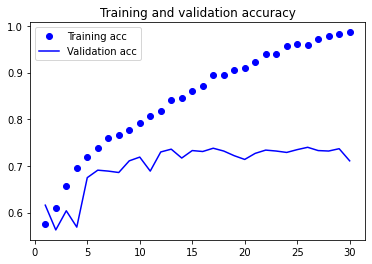

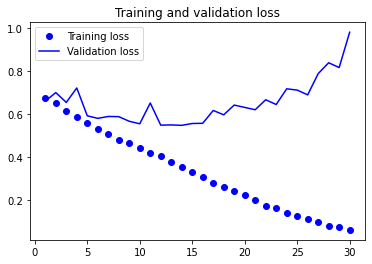

In [26]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.


Because you have relatively few training samples (2,000), overfitting will be your
number-one concern. 
#### You already know
about a number of techniques that can help
mitigate overfitting, such as 
#### dropout and weight decay (L2 regularization). 
We’re now
going to work with 
#### a new one, specific to computer vision and used almost universally
when processing images with deep-learning models: 
#### data augmentation. 

## 5.2.5 Using data augmentation
pg = 139. A lot of further details are available

### Listing 5.11: Setting up a data augmentation configuration via ImageDataGenerator

In [27]:
# Note ye vala object sirf data augmentation k results show krnay k liye bnaya hay, so, NO RESCALING here
# rescale kr detay tu image nazar kahan aani thi?

datagen  =  ImageDataGenerator(
                rotation_range      =  40,
                width_shift_range   =  0.2,
                height_shift_range  =  0.2,
                shear_range         =  0.2,
                zoom_range          =  0.2,
                horizontal_flip     =  True,
                fill_mode           =  'nearest')


These are just a few of the options available (for more, see the Keras documentation).
Let’s quickly go over this code:

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.

- width_shift and height_shift are ranges (as a fraction of total width orheight) within which to randomly translate pictures vertically or horizontally.

- shear_range is for randomly applying shearing transformations.

- zoom_range is for randomly zooming inside pictures.

- horizontal_flip is for randomly flipping half the images horizontallyrelevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).

- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


#### Listing 5.12: Displaying some randomly augmented images


The shape of x is (150, 150, 3) 



After reshapping it becomes (1, 150, 150, 3)


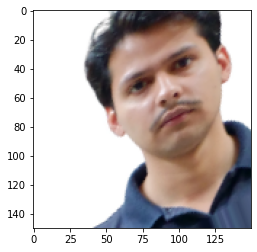

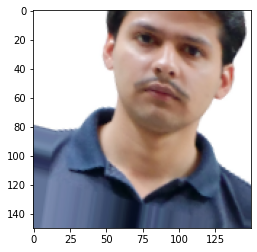

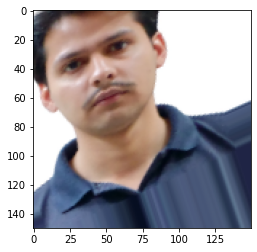

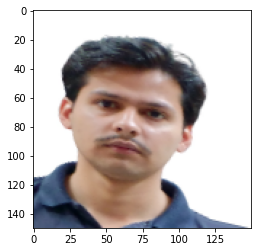

In [38]:
# is cell ko run krnay k liye zroori hay k pehlay is say pichla cell run kro
# pehlay 'ImageDataGenerator' object tu bna0, vo object phir yahan kaam day ga

from tensorflow.keras.preprocessing import image


# !!!!!!!!
# ye path khud say dia hay apni kisi image ka
img_path     =  r'C:\Users\Ans Imran\Desktop\New folder\3 4 jpeg.jpg'
my_img       =  image.load_img(img_path, target_size=(150, 150))



x = image.img_to_array(my_img)
print(f'The shape of x is {x.shape} \n\n\n')

x = x.reshape((1,) + x.shape)

print(f'After reshapping it becomes {x.shape}')



i=0

for batch in datagen.flow(x, batch_size=1):  # datagen: jo k aik object hum nay pichlay cel main bnaya tha, vo yahan use hua hay
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # yani 4char bar loop chlay gi, chahay tu 4 ki bajaye 10 d/f images bhi generate krva lo
        break
plt.show()

# Kindly see pg = 139 as well, for further comments


#### Listing 5.13: Defining a new convnet that includes dropout
Dropout Layers + Data Augmentation

In [41]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # Dropout layer lga di

model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1,   activation ='sigmoid'))


model.compile(loss      =  'binary_crossentropy',
              optimizer =  optimizers.RMSprop(learning_rate = 1e-4),
              metrics   =  ['acc'])


#### Listing 5.14: Training the convnet using data-augmentation generators

In [55]:
train_datagen = ImageDataGenerator(
                    rescale             =  1./255,
                    rotation_range      =  40,
                    width_shift_range   =  0.2,
                    height_shift_range  =  0.2,
                    shear_range         =  0.2,
                    zoom_range          =  0.2,
                    horizontal_flip     =  True,)



test_datagen   = ImageDataGenerator(rescale = 1./255) # Validation data ko augment nahi kr rahay


train_generator      = train_datagen.flow_from_directory(
                        train_dir,
                        target_size  =  (150, 150),
                        batch_size   =  32,
                        class_mode   =  'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (150, 150),
                        batch_size   =  32,
                        class_mode   =  'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [56]:
history = model.fit(
            train_generator,
#            steps_per_epoch  =  100,
            epochs           =  100,
            validation_data  =  validation_generator,
            validation_steps =  50)


Epoch 1/100
63/63 [==============================] - 31s 495ms/step - loss: 0.5406 - acc: 0.7230 - val_loss: 0.5135 - val_acc: 0.7200
Epoch 2/100
63/63 [==============================] - 33s 526ms/step - loss: 0.5403 - acc: 0.7285 - val_loss: 0.4850 - val_acc: 0.7630
Epoch 3/100
63/63 [==============================] - 33s 522ms/step - loss: 0.5408 - acc: 0.7270 - val_loss: 0.4954 - val_acc: 0.7520
Epoch 4/100
63/63 [==============================] - 34s 543ms/step - loss: 0.5247 - acc: 0.7370 - val_loss: 0.4963 - val_acc: 0.7400
Epoch 5/100
63/63 [==============================] - 34s 534ms/step - loss: 0.5376 - acc: 0.7440 - val_loss: 0.5356 - val_acc: 0.7160
Epoch 6/100
63/63 [==============================] - 32s 507ms/step - loss: 0.5304 - acc: 0.7405 - val_loss: 0.5354 - val_acc: 0.7140
Epoch 7/100
63/63 [==============================] - 32s 508ms/step - loss: 0.5252 - acc: 0.7385 - val_loss: 0.4890 - val_acc: 0.7490
Epoch 8/100
63/63 [==============================] - 33s 520ms

Epoch 62/100
63/63 [==============================] - 32s 504ms/step - loss: 0.4330 - acc: 0.7940 - val_loss: 0.4958 - val_acc: 0.7830
Epoch 63/100
63/63 [==============================] - 32s 500ms/step - loss: 0.4215 - acc: 0.8140 - val_loss: 0.4303 - val_acc: 0.8030
Epoch 64/100
63/63 [==============================] - 32s 503ms/step - loss: 0.4276 - acc: 0.8050 - val_loss: 0.4583 - val_acc: 0.7810
Epoch 65/100
63/63 [==============================] - 32s 507ms/step - loss: 0.4270 - acc: 0.8095 - val_loss: 0.4355 - val_acc: 0.7970
Epoch 66/100
63/63 [==============================] - 32s 502ms/step - loss: 0.4199 - acc: 0.8110 - val_loss: 0.4347 - val_acc: 0.7950
Epoch 67/100
63/63 [==============================] - 32s 502ms/step - loss: 0.4294 - acc: 0.8080 - val_loss: 0.4502 - val_acc: 0.7940
Epoch 68/100
63/63 [==============================] - 32s 505ms/step - loss: 0.4404 - acc: 0.8015 - val_loss: 0.4832 - val_acc: 0.7680
Epoch 69/100
63/63 [==============================] - 3

In [58]:
model.save('cats_and_dogs_small_2.h5')


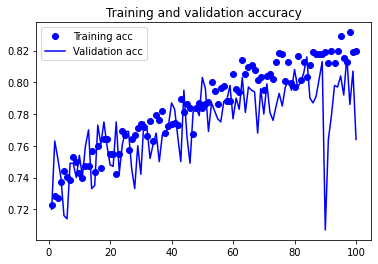

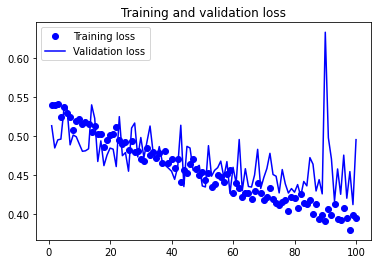

In [57]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Agar kisi pichlay epoch par accuracy etc behtar thi, tu os epoch pr, parameters ki values, roll back kesay krni hain, is k liye daikhain, chapter 7

colab pr chlanay k liye dataset ko google drive par mount kr lena, ye search kr lena, k mounting kesay krni hay